## This is an example IPython Notebook that leverages Esri's new Python API to allow an administrator to query their organization to check the license information for every item and update it as necessary

## Log in
##### 1. Enter uername and password (password characters will NOT be shown as plain text).

In [1]:
#import the getpass module for password security
import getpass

print("User: ") 
usrname = input()
print("password: ")
pword = getpass.getpass()

User: 
mperry_dcdev
password: 
········


#### 2. Creates a GIS object to interact with AGO or an ArcGIS Portal
All API calls are made via this GIS object. It's both simple and powerful.  


In [2]:
from arcgis.gis import GIS
gis = GIS(url="https://dcdev.maps.arcgis.com/", username=usrname, password=pword)

#### 3. This creates a user object named 'admin'.

In [3]:
%time admin = gis.users.get(usrname)

CPU times: user 14.4 ms, sys: 1.89 ms, total: 16.3 ms
Wall time: 100 ms


#### 4. This queries for all the content belonging to the user object created and assigned to 'admin' in the last cell and stores it in  'allItems.' Depending on the size of your org, and the amount of content, this could take several minutes.


In [4]:
%time allItems = admin.items()

CPU times: user 17.2 ms, sys: 2.56 ms, total: 19.8 ms
Wall time: 135 ms


#### 5. Visual representation of all the content.
Instead of just printing the list of items as plain text, the IPython Notebook allows me to display each item in a much richer, visual way.

<Item title:"SewerService" type:Feature Service owner:mperry_dcdev>
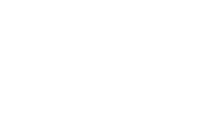

<Item title:"qa_fieldsWithDots" type:Feature Service owner:mperry_dcdev>
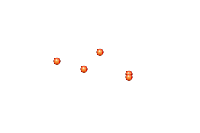

<Item title:"Vacant_Buildings" type:Feature Service owner:mperry_dcdev>
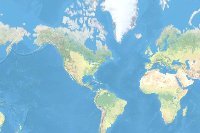

<Item title:"Planimetric" type:Feature Service owner:mperry_dcdev>
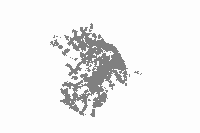

<Item title:"PublicParking" type:Feature Service owner:mperry_dcdev>

<Item title:"Loudoun County Growth" type:Web Mapping Application owner:mperry_dcdev>
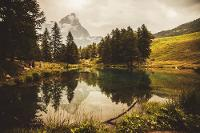

<Item title:"WORLD_BANK" type:Feature Service owner:mperry_dcdev>
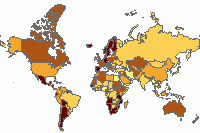

<Item title:"LawEnforcementFeatures" type:Feature Service owner:mperry_dcdev>
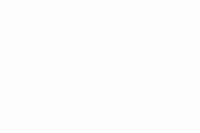

<Item title:"Activities" type:Feature Service owner:mperry_dcdev>
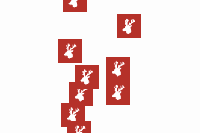

<Item title:"Census2010PercentEmployed" type:Feature Service owner:mperry_dcdev>
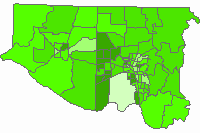

<Item title:"Loudoun County Growth" type:Web Map owner:mperry_dcdev>
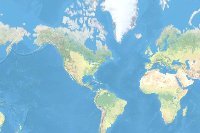

<Item title:"Census2010MedianAge" type:Feature Service owner:mperry_dcdev>
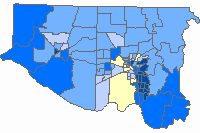

<Item title:"PhysicalEnvironment_Water" type:Feature Service owner:mperry_dcdev>
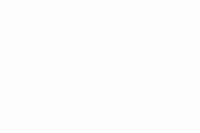

<Item title:"COLM_Restrooms" type:Feature Service owner:mperry_dcdev>

<Item title:"Census2010MedianHouseholdIncome2" type:Feature Service owner:mperry_dcdev>
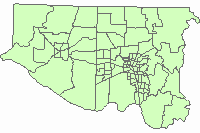

<Item title:"cdphe_geographic_analysis_boundaries" type:Feature Service owner:mperry_dcdev>
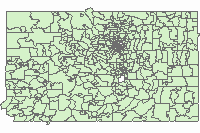

<Item title:"MovingViolations" type:Map Service owner:mperry_dcdev>
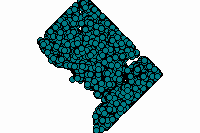

<Item title:"loudounCountyGrowth" type:Feature Service owner:mperry_dcdev>
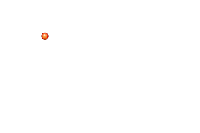

<Item title:"MoCo_RecycleCollectionAreas_FS" type:Feature Service owner:mperry_dcdev>

<Item title:"forecast_meteoceanhydro_sfc_ndfd_time" type:Feature Service owner:mperry_dcdev>
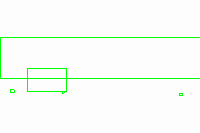

<Item title:"MD_SportVenues" type:Feature Service owner:mperry_dcdev>
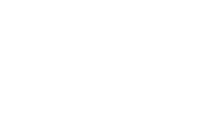

<Item title:"Wellington_City_Suburbs" type:Feature Service owner:mperry_dcdev>

In [5]:
from IPython.display import display
for item in allItems:
    try:
        display(item)
        #print(item.licenseInfo)
    except:
        pass

### Show me a list of all my items that either don't have a license set, or have an invalid one. Append them to a list of items to fix.
The available liceses is just a simple Python list. It can be modified or updated as necessary quite easily.

In [6]:
Licenses = ['CC0','CC BY','CC BY-SA','PDDL','ODbL','ODC-BY']

<Item title:"Activities" type:Feature Service owner:mperry_dcdev>
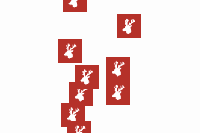

Current license:  CCBY


<Item title:"PhysicalEnvironment_Water" type:Feature Service owner:mperry_dcdev>
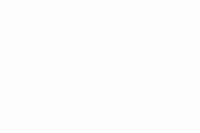

Current license:  CC0adas


<Item title:"loudounCountyGrowth" type:Feature Service owner:mperry_dcdev>
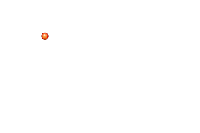

Current license:  None


<Item title:"MD_SportVenues" type:Feature Service owner:mperry_dcdev>
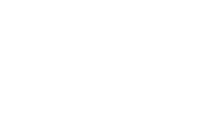

Current license:  CC)


In [7]:
#initialize an empty list to hold items with no bad license data
needLicense = []

for item in allItems:
    if item.licenseInfo not in Licenses or item.licenseInfo == 'None':
        display(item)
        print ("Current license: ", item.licenseInfo)
        needLicense.append(item)

#### 6. This cell iterates over everything stored in the needLicense list, and updates the licenseInfo attribute  of the item properties.

In [8]:
for thing in needLicense:
    thing.update(item_properties={'licenseInfo':'CC0'})

<Item title:"Activities" type:Feature Service owner:mperry_dcdev>
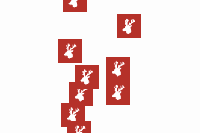

Activities
CC0


<Item title:"PhysicalEnvironment_Water" type:Feature Service owner:mperry_dcdev>
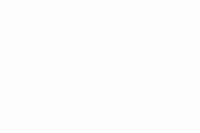

PhysicalEnvironment_Water
CC0


<Item title:"loudounCountyGrowth" type:Feature Service owner:mperry_dcdev>
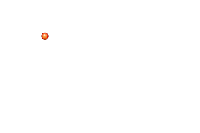

loudounCountyGrowth
CC0


<Item title:"MD_SportVenues" type:Feature Service owner:mperry_dcdev>
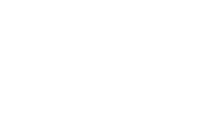

MD_SportVenues
CC0


In [9]:
for thing in needLicense:
    display(thing)
    print(thing.title)
    print(thing.licenseInfo)